## **Project Description**


**Interconnect**, a telecommunications operator, wants to be able to predict customer churn.

By identifying users who are planning to switch providers, the company will offer them promotions and special plan options.

Interconnect’s marketing team has collected some personal data from its customers, including information about their plans and contracts.

## Interconnect Services

Interconnect mainly provides two types of services:

1. Landline Phone => The phone can be connected to multiple lines at the same time.
2. Internet => The network can be established through a telephone line (DSL, digital subscriber line) or via a fiber optic cable.

Some other services provided by the company include:

* Internet security: antivirus software (**DeviceProtection**) and a malicious website blocker (**OnlineSecurity**).
* A dedicated technical support line (**TechSupport**).
* Cloud file storage and data backup (**OnlineBackup**).
* TV streaming (**StreamingTV**) and a movie directory (**StreamingMovies**).

Customers can choose between making monthly payments or signing a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after the transaction.

## File Data Description

The data consists of files obtained from different sources:
- contract.csv — contractual information;
- personal.csv — personal data of customers;
- internet.csv — information about Internet services;
- phone.csv — information about telephone services.

In each file, the `customerID` column contains a unique code assigned to each customer. The contractual information is valid from 1 February 2020.

## Objective

Develop a Machine Learning model that can identify (predict) whether the customer is planning to leave the Interconnect operator.

This model will have **AUC-ROC** as the primary evaluation metric and **Accuracy** as an additional metric, if necessary.

## Work Plan

- **Data Pre-Analysis**: a preliminary, more superficial analysis will be performed to understand the information contained in the files provided to better define the strategies for exploratory data analysis.

- **Data Pre-Processing**: the data will be properly prepared, undergoing some cleaning and adjustment processes.

- **Exploratory Data Analysis**: a more in-depth analysis of the information provided in the files provided to understand the relationships between the variables.

- **Data Set Division**: the data will be divided into training and test sets so that it is possible to train models and test their performance, identifying which one will be the best for this project.

- **Identification and Definition of the Best Model**: after structuring different models with different models using the training set to identify which one obtains the best result.

- **Test of the Best Model**: this stage will be when the model that obtained the best result with the training set will be tested and its performance verified with the test set.

## Libraries

Importing libraries to carry out the project.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import math as m
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Data Import

Importing the files provided

In [2]:
# Importing data
df_contract = pd.read_csv("contract.csv")
df_personal = pd.read_csv("personal.csv")
df_internet = pd.read_csv("internet.csv")
df_phone = pd.read_csv("phone.csv")

## Pre Data Analysis

A preliminary analysis will be carried out to understand the information contained in the files made available to better define the strategies for exploratory data analysis.

### Pre-Analysis of data on Contractual Information

In [3]:
# Sampling contract data
display(df_contract.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [4]:
# General contract information
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
# Checking for duplicate contract data
display(df_contract.duplicated().sum())

np.int64(0)

In [6]:
# Statistical analysis of numerical columns of contract data
display(df_contract.describe())

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


It is observed that the column names are in upper and lower case letters and without spaces between words, which may hinder the progress of the execution of this project.

There is no information on the duration of the contract, as this information is important for data modeling.

There is data with the wrong type:
- `BeginDate` as object
- `EndDate` as object
- `TotalCharges` as object

The `PaperlessBilling` column contains information such as **'Yes'** or **'No'**. It is interesting that these were in binary form with **1** in place of 'Yes' and **0** in place of 'No'.

In the pre-statistical analysis of the numerical data, the `TotalCharges` column was not evaluated. This will be investigated.

It is interesting that there is a column informing whether the user is active or not.

There is no duplicate data.

### Pre-Analysis of data on Customer Personal Data

In [7]:
# Sampling of personal data
display(df_personal.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [8]:
# General information about personal data
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
# Checking for duplicate data of personal data
display(df_personal.duplicated().sum())

np.int64(0)

In [10]:
# Statistical analysis of numerical columns of personal data
display(df_personal.describe())

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


It is noted that the column names are also in upper and lower case letters and without spaces between words, which may make it difficult to execute this project.

The `Partner` and `Dependents` columns contain information such as 'Yes' or 'No'. It is interesting that these were in binary form with 1 in place of 'Yes' and 0 in place of 'No'.

Transforming the `gender` column into binary with **1** or **0** will help in regression modeling.

There is no duplicate data.

### Pre-Analysis of Internet Services Information Data

In [11]:
# Sampling of internet service data
display(df_internet.head(10))

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [12]:
# General information about internet services
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [13]:
# Checking duplicate data from internet services
display(df_internet.duplicated().sum())

np.int64(0)

It is also noted that the column names are in upper and lower case letters and without spaces between words, which may make it difficult to execute this project.

The columns `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` and `StreamingMovies` contain information such as 'Yes' or 'No'. It is interesting that these were in binary form with 1 in place of 'Yes' and 0 in place of 'No'.

There is no duplicate data.

### Pre-Analysis of Telephone Service Information Data

In [14]:
# Sampling data from telephone services
display(df_phone.head(10))

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [15]:
# General information about telephone services
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [16]:
# Checking duplicate data from phone services
display(df_phone.duplicated().sum())

np.int64(0)

Again, it is observed that the column names are in upper and lower case letters and without spaces between words, which could make it difficult to execute this project.

The `MultipleLines` column contains information such as 'Yes' or 'No'. It is interesting that these were in binary form with 1 in place of 'Yes' and 0 in place of 'No'.

There is no duplicate data.

Since each file contains the customerID column and this is a unique code assigned to each customer, these files can be joined into just one DataFrame.

## Data Pre-Processing

In this step, the data will be adjusted and prepared by going through cleaning processes considering the observations raised during the *Pre-Data Analysis*.

### Data Pre-Processing of Contractual Information data

In [17]:
# Adjusting contract data column names
df_contract.columns = ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']

# Checking
display(df_contract.head(1))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [18]:
# Creating the active user column ('active_user'). 1 will be active and 0 will be not active
df_contract['active_user'] = df_contract.end_date.map(lambda i: 1 if i == 'No' else 0).astype(int)

# Adjusting the 'end_date' column
df_contract['end_date'] = df_contract.end_date.map(lambda i: float('NaN') if i == 'No' else i).astype('datetime64[s]')

# Adjusting the data type of the 'begin_date' column
df_contract['begin_date'] = df_contract['begin_date'].astype('datetime64[s]')

# Creating the contract duration column in days
last_date = dt.datetime(2020,2,1)
df_contract['contract_duration'] = (df_contract.end_date.fillna(last_date) - df_contract.begin_date)/np.timedelta64(1,'D')

# Setting the 'paperless_billing' column to 1 for Yes and 0 for No
df_contract['paperless_billing'] = df_contract.paperless_billing.eq('Yes').mul(1).astype(int)

Investigating the `total charges` column.

In [19]:
# Analyzing the data in the 'total charge' column
display(df_contract['total_charges'].unique())
print('Valor máximo da coluna:', df_contract['total_charges'].max())
print('Valor mínimo da coluna:', df_contract['total_charges'].min())

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

Valor máximo da coluna: 999.9
Valor mínimo da coluna:  


The minimum value of the `total_charges` column is a 'missing information' and is 'blank'/'empty' in the information location, but did not appear as missing values. These will be replaced by '0' (zero).

In [20]:
# Adjusting the 'total charges' column
df_contract['total_charges'] = df_contract.total_charges.map(lambda i: 0 if i == ' ' else i).astype('float')

# Checking
display(df_contract.head())
df_contract.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,active_user,contract_duration
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,1,31.0
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,1,1036.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,0,61.0
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,1,1371.0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,0,61.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype        
---  ------             --------------  -----        
 0   customer_id        7043 non-null   object       
 1   begin_date         7043 non-null   datetime64[s]
 2   end_date           1869 non-null   datetime64[s]
 3   type               7043 non-null   object       
 4   paperless_billing  7043 non-null   int64        
 5   payment_method     7043 non-null   object       
 6   monthly_charges    7043 non-null   float64      
 7   total_charges      7043 non-null   float64      
 8   active_user        7043 non-null   int64        
 9   contract_duration  7043 non-null   float64      
dtypes: datetime64[s](2), float64(3), int64(2), object(3)
memory usage: 550.4+ KB


With the adjustments made, the `end_date` column had missing values ​​and deals with active users, as it is not a plan end date. This situation will be addressed later.

### Pre-Processing of data on Customer Personal Data

In [21]:
# Adjusting column names
df_personal.columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

# Adjusting the 'gender' column with 1 for Male and 0 for Female
df_personal['gender'] = df_personal.gender.map(lambda i: 1 if i == 'Male' else 0)

# Setting the 'partner' column to 1 for Yes and 0 for No
df_personal['partner'] = df_personal.partner.map(lambda i: 1 if i == 'Yes' else 0) 

#Adjusting the 'dependents' column with 1 for Yes and 0 for No
df_personal['dependents'] = df_personal.dependents.map(lambda i: 1 if i == 'Yes' else 0) 


# Checking
display(df_personal.head())
df_personal.info()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,0,0,1,0
1,5575-GNVDE,1,0,0,0
2,3668-QPYBK,1,0,0,0
3,7795-CFOCW,1,0,0,0
4,9237-HQITU,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   int64 
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   int64 
 4   dependents      7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


### Pre-Processing of Internet Service Information data

In [22]:
# Adjusting column names
df_internet.columns = ['customer_id', 'internet_service','online_security','online_backup','device_protection', 
                         'tech_support','streaming_tv','streaming_movies']

# Adjusting column data with 1 for Yes and 0 for No
column_list = ['online_security','online_backup','device_protection', 
                         'tech_support','streaming_tv','streaming_movies']

for col in column_list:
    df_internet[col] = df_internet[col].map(lambda i: 1 if i == 'Yes' else 0)

# Checking
display(df_internet.head(5))
df_internet.info()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,0,1,0,0,0,0
1,5575-GNVDE,DSL,1,0,1,0,0,0
2,3668-QPYBK,DSL,1,1,0,0,0,0
3,7795-CFOCW,DSL,1,0,1,1,0,0
4,9237-HQITU,Fiber optic,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   int64 
 3   online_backup      5517 non-null   int64 
 4   device_protection  5517 non-null   int64 
 5   tech_support       5517 non-null   int64 
 6   streaming_tv       5517 non-null   int64 
 7   streaming_movies   5517 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 344.9+ KB


### Pre-Processing of Telephone Service Information data

In [23]:
# Adjusting column names
df_phone.columns = ['customer_id', 'multiple_lines']

# Adjusting data from column 'multiple_lines' with 1 for Yes and 0 for No
df_phone['multiple_lines'] = df_phone.multiple_lines.map(lambda i: 1 if i == 'Yes' else 0)

# Checking
display(df_phone.head(5))
df_phone.info()

,customer_id,multiple_lines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.5+ KB


### Merging files into just 1 DataFrame

In [24]:
# Joining the data from the 4 files into just one DataFrame
df = df_contract.copy()
df = df.merge(df_personal, on='customer_id', how='left')
df = df.merge(df_internet, on='customer_id', how='left')
df = df.merge(df_phone, on='customer_id', how='left')

# Checking
display(df.head())
df.info()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,active_user,contract_duration,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,1,31.0,...,1,0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,1,1036.0,...,0,0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,0,61.0,...,0,0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,1,1371.0,...,0,0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,0,61.0,...,0,0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype        
---  ------             --------------  -----        
 0   customer_id        7043 non-null   object       
 1   begin_date         7043 non-null   datetime64[s]
 2   end_date           1869 non-null   datetime64[s]
 3   type               7043 non-null   object       
 4   paperless_billing  7043 non-null   int64        
 5   payment_method     7043 non-null   object       
 6   monthly_charges    7043 non-null   float64      
 7   total_charges      7043 non-null   float64      
 8   active_user        7043 non-null   int64        
 9   contract_duration  7043 non-null   float64      
 10  gender             7043 non-null   int64        
 11  senior_citizen     7043 non-null   int64        
 12  partner            7043 non-null   int64        
 13  dependents         7043 non-null   int64        
 14  internet_service   5517 

After this data preprocessing, we obtained a single DataFrame containing all the information from the 4 files. It has 7043 rows with 22 columns.

Missing values ​​are observed in the `end_date` column for users who are still active due to the adjustments to transform it into the 'datetime' data type that was necessary to create the `contract_duration` column.

Since there was no information about all users' internet services and telephone services, we also have missing values ​​in the `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` and `multiple_lines` columns.

These missing values ​​will be treated during Exploratory Data Analysis.

## Exploratory Data Analysis

Analysis of data density related to the duration of the contract with an active or inactive user.

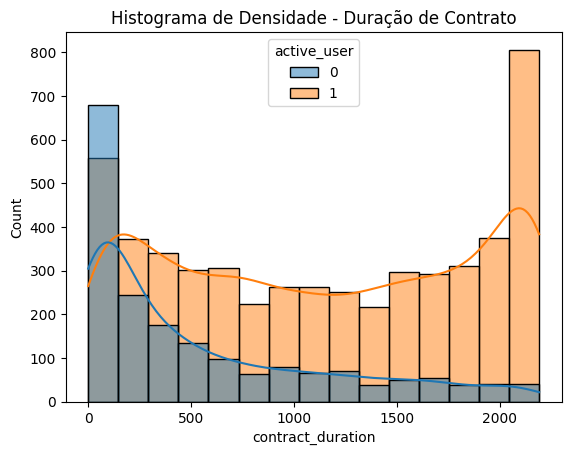

In [25]:
# Plotting density histogram
sns.histplot(data=df_contract, 
             x="contract_duration", 
             hue="active_user", 
             kde=True).set(title='Histograma de Densidade - Duração de Contrato');

In [26]:
# Checking the number of active or inactive users
print(df.active_user.value_counts(),'\n')

# Checking the number of active or inactive users with a contract of over 1000 days
print(df.query('contract_duration > 1000').active_user.value_counts())

active_user
1    5174
0    1869
Name: count, dtype: int64 

active_user
1    2859
0     409
Name: count, dtype: int64


In [27]:
# Defining function for One-Hot Encoding of data
def ohe_fast(data, col):
    if data[col].isna().sum() > 0:
        data = pd.concat([data,pd.get_dummies(data[col], prefix= col ,dummy_na=True,drop_first=True)],axis=1)
    else:
        data = pd.concat([data,pd.get_dummies(data[col], prefix= col ,drop_first=True)],axis=1)
        
    data.drop(col,axis=1, inplace=True)
    return data

After data pre-processing, some columns are not important for modeling and will be excluded, they are:
- customer_id
- end_date
- begin_date

Missing values ​​in the `internet_service` column will be replaced by 'No' and the rest by '0' (zero).

In [28]:
# Creating a copy of the DataFrame 'df'
df_ohe = df.copy()

# Deleting columns from 'df_ohe'
df_ohe.drop(['customer_id','end_date', 'begin_date'], axis=1, inplace=True)

# Handling missing values
df_ohe['internet_service'] = df_ohe['internet_service'].fillna('No')
df_ohe = df_ohe.fillna(0)

# Checking
display(df_ohe.head())
df_ohe.info()

,type,paperless_billing,payment_method,monthly_charges,total_charges,active_user,contract_duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,Month-to-month,1,Electronic check,29.85,29.85,1,31.0,0,0,1,0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,One year,0,Mailed check,56.95,1889.50,1,1036.0,1,0,0,0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Month-to-month,1,Mailed check,53.85,108.15,0,61.0,1,0,0,0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,One year,0,Bank transfer (automatic),42.30,1840.75,1,1371.0,1,0,0,0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,Month-to-month,1,Electronic check,70.70,151.65,0,61.0,0,0,0,0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   int64  
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   active_user        7043 non-null   int64  
 6   contract_duration  7043 non-null   float64
 7   gender             7043 non-null   int64  
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   int64  
 10  dependents         7043 non-null   int64  
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   float64
 13  online_backup      7043 non-null   float64
 14  device_protection  7043 non-null   float64
 15  tech_support       7043 non-null   float64
 16  streaming_tv       7043 

Some data will be encoded using the One-Hot Encoding method.

In [29]:
# Encoding data
num_col = ['monthly_charges', 'total_charges', 'contract_duration']
ordinal_col = ['type', 'payment_method', 'internet_service']
cat_col = list(set(df_ohe.columns) - set(num_col) - set(ordinal_col))

for col in cat_col:
    df_ohe[col] = df_ohe[col].astype('uint8')

for col in ordinal_col:
    df_ohe = ohe_fast(df_ohe, col)
    
# Checking
display(df_ohe.head())
df_ohe.info()

,paperless_billing,monthly_charges,total_charges,active_user,contract_duration,gender,senior_citizen,partner,dependents,online_security,...,streaming_tv,streaming_movies,multiple_lines,type_One year,type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_Fiber optic,internet_service_No
0,1,29.85,29.85,1,31.0,0,0,1,0,0,...,0,0,0,False,False,False,True,False,False,False
1,0,56.95,1889.50,1,1036.0,1,0,0,0,1,...,0,0,0,True,False,False,False,True,False,False
2,1,53.85,108.15,0,61.0,1,0,0,0,1,...,0,0,0,False,False,False,False,True,False,False
3,0,42.30,1840.75,1,1371.0,1,0,0,0,1,...,0,0,0,True,False,False,False,False,False,False
4,1,70.70,151.65,0,61.0,0,0,0,0,0,...,0,0,0,False,False,False,True,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   paperless_billing                       7043 non-null   uint8  
 1   monthly_charges                         7043 non-null   float64
 2   total_charges                           7043 non-null   float64
 3   active_user                             7043 non-null   uint8  
 4   contract_duration                       7043 non-null   float64
 5   gender                                  7043 non-null   uint8  
 6   senior_citizen                          7043 non-null   uint8  
 7   partner                                 7043 non-null   uint8  
 8   dependents                              7043 non-null   uint8  
 9   online_security                         7043 non-null   uint8  
 10  online_backup                           7043 non-null   uint

After pre-processing the data and performing exploratory data analysis, we have a DataFrame with 7043 rows and 23 columns, which contain only numerical data to facilitate modeling with a regression model.

The next steps will be:
- Dataset Division
- Identification and Definition of the Best Model
- Testing of the Best Model

## Model Development

### Dataset Splitting

In order to train models and test the result of the best machine learning found, the `df_ohe` dataset will be divided into a 'training set' and a 'test set'. 20% of the data will be allocated for final testing.

In [30]:
# Splitting the datasets into training and testing
train, test = train_test_split(df_ohe, test_size = 0.2, random_state = 12345)

# Scaling data sets
scaler = MinMaxScaler(copy = False)
train[num_col] = scaler.fit_transform(train[num_col])
test[num_col] = scaler.transform(test[num_col])

In [31]:
# Preparing the features and target of the data sets
features_train = train.drop(['active_user'], axis=1)
target_train = train['active_user']

features_test = test.drop(['active_user'], axis=1)
target_test = test['active_user']

# Verificando
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print()
features_train.info()

(5634, 22)
(5634,)
(1409, 22)
(1409,)

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 1580 to 4578
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   paperless_billing                       5634 non-null   uint8  
 1   monthly_charges                         5634 non-null   float64
 2   total_charges                           5634 non-null   float64
 3   contract_duration                       5634 non-null   float64
 4   gender                                  5634 non-null   uint8  
 5   senior_citizen                          5634 non-null   uint8  
 6   partner                                 5634 non-null   uint8  
 7   dependents                              5634 non-null   uint8  
 8   online_security                         5634 non-null   uint8  
 9   online_backup                           5634 non-null   uint8  
 10  device_protection      

### Training Models

#### Decision Tree Model

In [32]:
%%time
best_score_dt = 0
best_max_depth_dt = 0

for max_depth in range(1, 11):
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12345)
    scores = cross_val_score(model_dt, features_train, target_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = scores.mean()
    
    if score > best_score_dt:
        best_score_dt = score
        best_max_depth_dt = max_depth
        
print('Decision Tree Model')
print('Best AUC-ROC value found considering the defined range')
print('Best-performing max_depth value was ', best_max_depth_dt,' obtaining AUC-ROC value of:', best_score_dt)

Decision Tree Model
Best AUC-ROC value found considering the defined range
Best-performing max_depth value was  6  obtaining AUC-ROC value of: 0.8452006625861486
CPU times: user 928 ms, sys: 207 ms, total: 1.13 s
Wall time: 7.21 s


#### Random Forest Model

In [33]:
%%time
best_score_fr = 0
best_k_fr = 0

for k in range(1, 11):
    model_fr = RandomForestClassifier(n_estimators=k, random_state=12345)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12345)
    scores = cross_val_score(model_fr, features_train, target_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = scores.mean()
    
    if score > best_score_fr:
        best_score_fr = score
        best_k_fr = k

print('Random Forest Model')
print('Best AUC-ROC value found considering the defined range')
print('Best-performing k value was ', best_k_fr, 'obtaining the AUC-ROC value of:', best_score_fr)

Random Forest Model
Best AUC-ROC value found considering the defined range
Best-performing k value was  10 obtaining the AUC-ROC value of: 0.8173135742398965
CPU times: user 935 ms, sys: 141 ms, total: 1.08 s
Wall time: 8.21 s


#### Logistics Model

In [34]:
%%time
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12345)
scores = cross_val_score(model_lr, features_train, target_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score = scores.mean()

print('Logistic Regression Model')
print('The AUC-ROC value found is:', score)

Logistic Regression Model
The AUC-ROC value found is: 0.8449389003017876
CPU times: user 111 ms, sys: 19.4 ms, total: 131 ms
Wall time: 549 ms


### Results of Tested Models

In [35]:
print('Decision Tree Model')
print('Best AUC-ROC value found considering the defined range')
print('Best-performing max_depth value was ', best_max_depth_dt,' obtaining AUC-ROC value of:', best_score_dt)
print()
print('Random Forest Model')
print('Best AUC-ROC value found considering the defined range')
print('Best-performing k value was ', best_k_fr, 'obtaining the AUC-ROC value of:', best_score_fr)
print()
print('Logistic Regression Model')
print('The AUC-ROC value found is:', score)


Decision Tree Model
Best AUC-ROC value found considering the defined range
Best-performing max_depth value was  6  obtaining AUC-ROC value of: 0.8452006625861486

Random Forest Model
Best AUC-ROC value found considering the defined range
Best-performing k value was  10 obtaining the AUC-ROC value of: 0.8173135742398965

Logistic Regression Model
The AUC-ROC value found is: 0.8449389003017876


The Model that obtained the best result with the training data set was the Logistic Regression Model. The next step will be to verify its result with the test set.

### Checking the Result of the Logistic Regression Model on the Test Set

In [36]:
%%time
# Checking the ROC-AUC result of the Logistic Regression Model with the test set
scores_test = cross_val_score(model_lr, features_test, target_test, scoring='roc_auc', cv=cv, n_jobs=-1)
score_cb_test = scores_test.mean()

print('Logistic Regression Model')
print('The AUC-ROC value for the test set is:', score_cb_test)

Logistic Regression Model
The AUC-ROC value for the test set is: 0.8366924921855939
CPU times: user 80.7 ms, sys: 10.3 ms, total: 91 ms
Wall time: 265 ms


In [37]:
# Printing the result with the test set
print('Logistic Regression Model')
print('The AUC-ROC value for the test set is:', score_cb_test)

Logistic Regression Model
The AUC-ROC value for the test set is: 0.8366924921855939


In [38]:
print('The Logistic Regression Model achieved an AUC-ROC result of', score_cb_test,'.')

The Logistic Regression Model achieved an AUC-ROC result of 0.8366924921855939 .


## Conclusions

The task of this project was to develop a Machine Learning model that could identify (predict) whether a customer was planning to leave the Interconnect operator. This model's performance was assessed using the **AUC-ROC** metric.

The following steps were taken in the work plan:

- **Data Pre-Analysis**
- **Data Pre-Processing**
- **Exploratory Data Analysis**
- **Data Set Division**
- **Identification and Definition of the Best Model**
- **Test of the Best Model**

All of these steps were worked on in this project, with an in-depth analysis of the information so that some adjustments could be made to the data for better modeling. The 6 steps of the work plan were executed.

During Data Pre-Processing, in the phase where the files were joined/merged into a single DataFrame, there was a difficulty in continuing the project, as it was identified that data was being lost after processing. After an investigation, it was found that the decision to perform an inner join was wrong. After some testing, it was observed that the best way would be to use the left join, in the way the work was being developed, and fill in the missing values ​​later.

These pre-processing and data joining steps were essential to obtain a single DataFrame with clean and organized information for better exploratory analysis and modeling.

During the exploratory analysis, the One-Hot-Encoding method was used to encode the information in columns that had characteristics in the form of 'text' (non-numeric).

When preparing the data so that it would be possible to train different types of models, these were divided into 2 data sets, with 80% of the total being for the training set and 20% for the test set. This was essential to be able to test the best model found and verify its performance.

After training 4 different types of models, the best result was achieved with the Logistic Regression Model and this obtained an AUC-ROC score of approximately **0.85 in the training set** and **0.84 in the test set**.